In [1]:
# Necessary imports
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Define some varialbles
sample_rate = 1e6
TONE_FREQUENCY = 50e3

## Generating a tone
This function will generate a tone at the given frequency, with a bit of noise

In [6]:
def generate_tone_with_noise(tone_freq = 50e3):
    """
    Generates a tone plus noise
    """
    t = np.arange(1024 * 1000) / sample_rate  # Time vector
    x = np.sin(2 * np.pi * tone_freq * t) + 0.2 * np.random.randn(len(t))
    return t, x

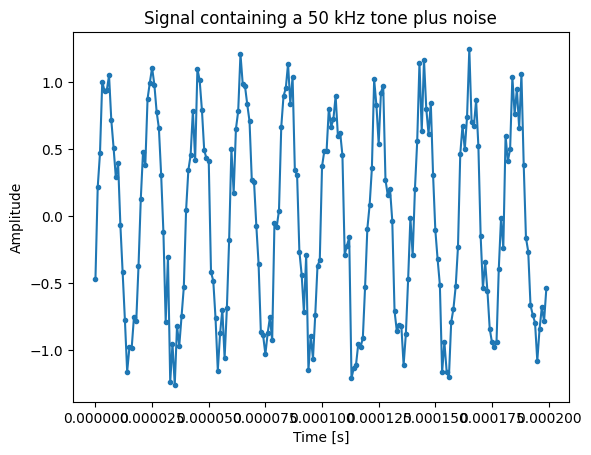

In [8]:
time, tone = generate_tone_with_noise(TONE_FREQUENCY)
plt.figure(0)
plt.plot(time[:200], tone[:200], ".-")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Signal containing a 50 kHz tone plus noise")
plt.show()

## Spectrogram
Let's build a spectrogram of this tone with plt

In [18]:
fft_size = 1024
num_rows = int(np.floor(len(tone)/fft_size))
spectrogram = np.zeros((num_rows, fft_size))

In [19]:
for i in range(num_rows):
    S = np.fft.fftshift(np.fft.fft(tone[i*fft_size:(i+1)*fft_size]))
    spectrogram[i, :] = 10 * np.log10(
        np.abs(S) ** 2
    )

In [20]:
# Let's remove negative frequencies (Real signal)
spectrogram = spectrogram[:, fft_size // 2:]

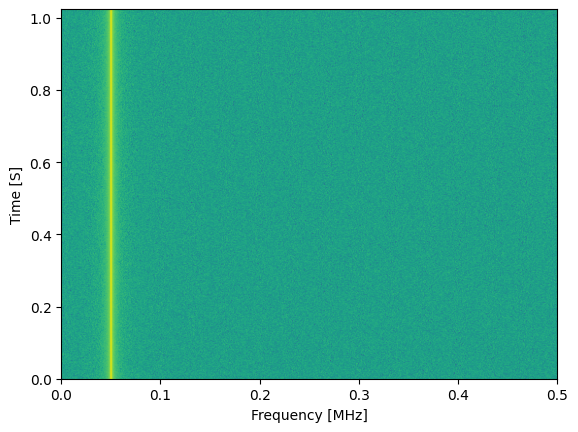

In [21]:
# Show the spectrogram now
extent = [0, sample_rate/2/1e6, 0, len(tone)/sample_rate]
plt.imshow(spectrogram, aspect="auto", extent=extent)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [S]")
plt.show()